In [1]:
import numpy as np
from pathlib import Path

from sladsnet.input_params import ERDInputParams, GeneralInputParams, SampleParams
from sladsnet.code.measurement_interface import TransmissionSimulationMeasurementInterface#ExperimentMeasurementInterface
from sladsnet.code.erd import SladsSklearnModel
from sladsnet.code.results import Result
from sladsnet.code.base import Sample
from sladsnet.code.sampling import run_sampling
from sladsnet.code.utils import renormalize

In [13]:
import matplotlib.pyplot as plt

In [2]:
C_VALUE = 2
train_base_path = Path.cwd().parent / 'ResultsAndData/TrainingData/cameraman/'
erd_model = SladsSklearnModel(load_path=train_base_path / f'c_{C_VALUE}/erd_model_relu.pkl')

In [7]:
inner_batch_size = 50
initial_scan_points_num = 2000

stop_ratio = 0.3
store_results_percentage = 1

affected_neighbors_window_min = 5
affected_neighbors_window_max = 15
full_erd_recalculation_frequency = 10

In [8]:
params_erd = ERDInputParams(c_value=C_VALUE,
                            full_erd_recalculation_frequency=full_erd_recalculation_frequency,
                            affected_neighbors_window_min=affected_neighbors_window_min,
                            affected_neighbors_window_max=affected_neighbors_window_max)
params_gen = GeneralInputParams()

sample_params = SampleParams(image_shape=(600, 400),
                             inner_batch_size=inner_batch_size,
                             initial_scan_points_num=initial_scan_points_num,
                             initial_scan_ratio=None,
                             stop_ratio=stop_ratio,
                             random_seed=11)


#interface = ExperimentMeasurementInterface('instructions.csv', num_initial_idxs= 2000)
#interface.perform_measurement(sample_params.initial_idxs)
img_path = Path.cwd().parent /'work_directory/analyze_s26_scans/norm_xrm.tif'
image = renormalize(image_path=img_path)
measurement_interface = TransmissionSimulationMeasurementInterface(image=image)

In [9]:
sample = Sample(sample_params=sample_params,
                general_params=params_gen,
                erd_params=params_erd,
                measurement_interface=measurement_interface,
                erd_model=erd_model)
results = Result()

In [10]:

run_sampling(sample, results=results, results_frequency_percentage=store_results_percentage, 
             stop_percentage=10,
             disable_progress_bar=False)

Reached the maximum sampling percentage for this sampling run. Stopping scan.


In [11]:
new_idxs = sample.find_new_measurement_idxs()

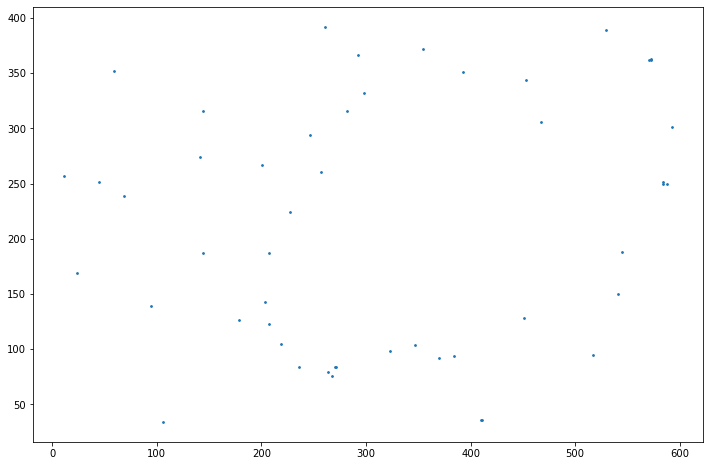

In [17]:
plt.figure(figsize=[12, 8])
plt.scatter(*new_idxs.T, s=3)
plt.show()

In [18]:
np.savetxt('50_points_after_10_percent.csv', new_idxs, delimiter=',', fmt='%10d')

In [19]:
a1 = np.empty((0,2), dtype='int32')

In [20]:
a1

array([], shape=(0, 2), dtype=int32)